# NLP Model for Spotify Songs

## Create a subset of data

In [1]:
#libraries imported

import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
import pickle

In [2]:
spotify_songs = pd.read_csv(r'C:\Users\temsy\Documents\GitHub\Spotifinder\spotify_songs.csv')

In [3]:
#Drop null values in lyrics column

spotify_songs =  spotify_songs.dropna()

In [4]:
spotify_songs.head()

,track_id,track_name,track_artist,lyrics,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,language
0,0017A6SJgTbfQVU2EtsPNo,Pangarap,Barbie's Cradle,Minsan pa Nang ako'y napalingon Hindi ko alam ...,41,1srJQ0njEQgd8w4XSqI4JQ,Trip,2001-01-01,Pinoy Classic Rock,37i9dQZF1DWYDQ8wBxd7xt,...,-10.068,1,0.0236,0.27900,0.01170,0.0887,0.566,97.091,235440,tl
1,004s3t0ONYlzxII9PLgU6z,I Feel Alive,Steady Rollin,"The trees, are singing in the wind The sky blu...",28,3z04Lb9Dsilqw68SHt6jLB,Love & Loss,2017-11-21,Hard Rock Workout,3YouF0u7waJnolytf9JCXf,...,-4.739,1,0.0442,0.01170,0.00994,0.3470,0.404,135.225,373512,en
2,00chLpzhgVjxs1zKC9UScL,Poison,Bell Biv DeVoe,"NA Yeah, Spyderman and Freeze in full effect U...",0,6oZ6brjB8x3GoeSYdwJdPc,Gold,2005-01-01,"Back in the day - R&B, New Jack Swing, Swingbe...",3a9y4eeCJRmG9p4YKfqYIx,...,-7.504,0,0.2160,0.00432,0.00723,0.4890,0.650,111.904,262467,en
3,00cqd6ZsSkLZqGMlQCR0Zo,Baby It's Cold Outside (feat. Christina Aguilera),CeeLo Green,I really can't stay Baby it's cold outside I'v...,41,3ssspRe42CXkhPxdc12xcp,CeeLo's Magic Moment,2012-10-29,Christmas Soul,6FZYc2BvF7tColxO8PBShV,...,-5.819,0,0.0341,0.68900,0.00000,0.0664,0.405,118.593,243067,en
4,00emjlCv9azBN0fzuuyLqy,Dumb Litty,KARD,Get up out of my business You don't keep me fr...,65,7h5X3xhh3peIK9Y0qI5hbK,KARD 2nd Digital Single ‘Dumb Litty’,2019-09-22,K-Party Dance Mix,37i9dQZF1DX4RDXswvP6Mj,...,-1.993,1,0.0409,0.03700,0.00000,0.1380,0.240,130.018,193160,en


In [5]:
#Only get songs with lyrics in English

spotify_songs = spotify_songs[spotify_songs['language']=='en']

In [6]:
#Only get the most popular 5000 songs

df1 = spotify_songs.sort_values('track_popularity', ascending = False)
df1 = df1[0:5000]
df1 = df1.reset_index()
df1.head()

,index,track_id,track_name,track_artist,lyrics,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,language
0,6925,2XU0oxnq2qxCpomAAuJY8K,Dance Monkey,Tones and I,"They say, ""Oh my God, I see the way you shine ...",100,0UywfDKYlyiu1b38DRrzYD,Dance Monkey (Stripped Back) / Dance Monkey,2019-10-17,"post-teen alternative, indie, pop (large variety)",...,-6.400,0,0.0924,0.69200,0.000104,0.1490,0.513,98.027,209438,en
1,14477,696DnlkuDOXcMAnKlTgXXK,ROXANNE,Arizona Zervas,"All for the 'Gram Bitches love the 'Gram Oh, w...",99,6HJDrXs0hpebaRFKA1sF90,ROXANNE,2019-10-10,Global Top 50 | 2020 Hits,...,-5.616,0,0.1480,0.05220,0.000000,0.4600,0.457,116.735,163636,en
2,4813,21jGcNKet2qwijlDFuPiPb,Circles,Post Malone,"Oh, oh, oh Oh, oh, oh Oh, oh, oh, oh, oh We ...",98,4g1ZRSobMefqF6nelkgibi,Hollywood's Bleeding,2019-09-06,Pop - Pop UK - 2019 - Canadian Pop - 2019 - Pop,...,-3.497,1,0.0395,0.19200,0.002440,0.0863,0.553,120.042,215280,en
3,1754,0sf12qNH5qcw8qpgymFOqD,Blinding Lights,The Weeknd,Yeah I've been tryna call I've been on my own ...,98,2ZfHkwHuoAZrlz7RMj0PDz,Blinding Lights,2019-11-29,Todo Éxitos,...,-4.075,1,0.0629,0.00147,0.000209,0.0938,0.345,171.017,201573,en
4,1375,0nbXyq5TXYPCO7pr3N8S4I,The Box,Roddy Ricch,Pullin' out the coupe at the lot Told 'em fuck...,98,52u4anZbHd6UInnmHRFzba,Please Excuse Me For Being Antisocial,2019-12-06,RapCaviar,...,-6.687,0,0.0559,0.10400,0.000000,0.7900,0.642,116.971,196653,en


In [7]:
#Create a function that gathers all the song lyrics into a list of strings

def gather_data(songs):
  data =[]
  for song in songs:
    data.append(spotify_songs['lyrics'][spotify_songs['track_id']==song])
  return data

In [8]:
songs = df1['track_id']

data = gather_data(songs)

In [9]:
#Convert Series into a list of strings

new_data = []

for song in data:
  str_song = pd.Series(song).item()
  new_data.append(str_song)

## Create TF-IDF model
Apply K Nearest Neighbors to find the 5 closest songs

In [10]:
#Load and test the dtm

dtm_filename = 'nlp_dtm.pkl'

dtm = pickle.load(open(dtm_filename, 'rb'))


In [11]:
#Load and test the model

model_filename = 'nlp_model.pkl'

# x = 0 #how to figure out which row is the selected song
# doc = dtm.iloc[x].values

loaded_model = pickle.load(open(model_filename, 'rb'))
# result = loaded_model.kneighbors([doc])
# print(result)

In [12]:
#function to get 4 nearest songs 

def select_nearest_songs(artist, song):
    
    #translate artist, song into doc dtm.iloc[x].values
    artist_songs = df1.loc[df1['track_artist']==artist]
    selected_song = artist_songs.loc[artist_songs['track_name']==song]
    x = selected_song.index
    x = x.item()

    doc = dtm.loc[x].values
    result = loaded_model.kneighbors([doc], n_neighbors=6)
    
    rec_songs = {"artist":[], "song":[]};
    
    for i in range(5):
        song = result[1][0][1+i]

        #translate the loc into an artist and song title
        artist = df1.loc[song]['track_artist']
        song = df1.loc[song]['track_name']
        
        rec_songs['artist'].append(artist)
        rec_songs['song'].append(song)
    
    return rec_songs

In [13]:
select_nearest_songs('Post Malone', 'Circles')

{'artist': ['Carly Rae Jepsen',
  'quickly, quickly',
  'Tones and I',
  'Alok',
  'benny blanco'],
 'song': ['Run Away With Me',
  'Lesson on Counting',
  'Johnny Run Away',
  'Tell Me Why',
  'Eastside (with Halsey & Khalid)']}

In [14]:
select_nearest_songs('Radiohead', 'Creep')

{'artist': ['quickly, quickly',
  'Run The Jewels',
  'Galantis',
  'Galantis',
  'P!nk'],
 'song': ['Lesson on Counting',
  'Close Your Eyes (And Count To Fuck)',
  'No Money',
  'No Money',
  'Just Like Fire (From the Original Motion Picture "Alice Through The Looking Glass")']}

# Compare lyrics of songs

In [15]:
#Fetch lyrics function

def get_lyrics(artist, song):
  songs_by_artist = df1[['track_id','track_name']][df1['track_artist'] == artist]
  song_id = songs_by_artist[songs_by_artist['track_name'] == song]
  song_id = song_id[:1] #This selects the first if there are more than one
  song_id = song_id['track_id']
  song_id = pd.Series(song_id).item()
  lyrics = df1['lyrics'][df1['track_id'] == song_id]
  lyrics = pd.Series(lyrics).item()
  return lyrics

In [16]:
#Print lyrics from both songs to compare

def compare_lyrics(artist, song):
    song_recs = select_nearest_songs(artist, song)
    
    rec_artist = song_recs['artist'][0]
    rec_song = song_recs['song'][0]
    
    lyrics1 = get_lyrics(artist, song)
    lyrics2 = get_lyrics(rec_artist, rec_song)
    
#     print(f'Chosen song lyrics from {song} by {artist}:\n {lyrics1}\n\n')

#     print(f'Recommended song lyrics from {rec_song} by {rec_artist}:\n {lyrics2}')
    
    return lyrics1, lyrics2

In [17]:
compare_lyrics('The Weeknd', 'Heartless')

("Young Metro, young Metro, young Metro (Sheesh) Ayy (Ayy) Young Metro, young Metro Never need a bitch, I'm\u2005what\u2005a bitch need\u2005(Bitch need) Tryna find the one that\u2005can fix me I've been dodgin' death in the six speed Amphetamine got my stummy feelin' sickly Yeah, I want it all now I've been runnin' through the pussy, need a dog pound Hundred models gettin' faded in the compound Tryna love me, but they never get a pulse down Why? 'Cause I'm heartless And I'm back to my ways 'cause I'm heartless All this money and this pain got me heartless Low life for life 'cause I'm heartless Said I'm heartless Tryna be a better man, but I'm heartless Never be a weddin' plan for the heartless Low life for life 'cause I'm heartless Said I'm heartless So much pussy, it be fallin' out the pocket Metro Boomin turn this ho into a moshpit Tesla pill got me flyin' like a cockpit Yeah, I got her watchin' Call me up, turn that pussy to a faucet Duffle bags full of drugs and a rocket Stix drun

# Visualization #1

In [18]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=50,
        max_font_size=40,
        scale=3,
        random_state=37).generate(str(data))
    
    fig = plt.figure(1, figsize=(12,12))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
        
    plt.imshow(wordcloud)
    plt.show()

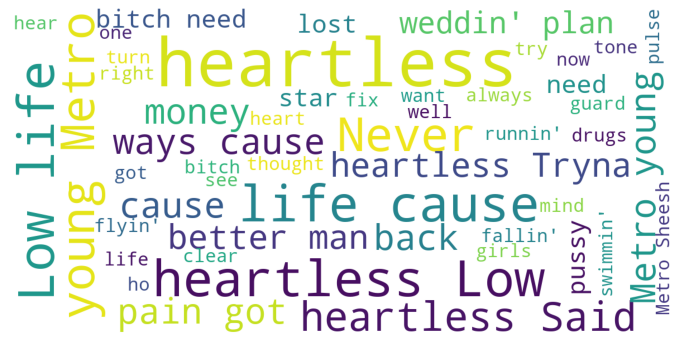

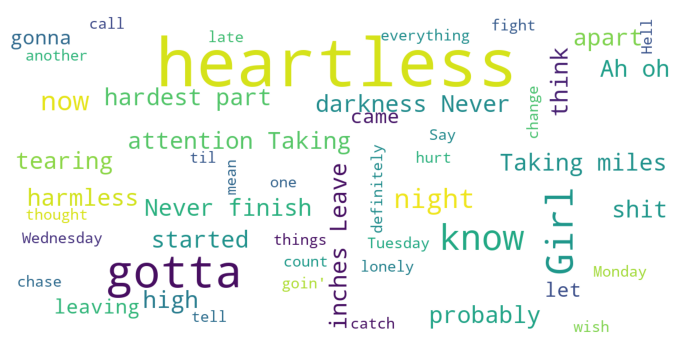

In [19]:
lyrics1, lyrics2 = compare_lyrics('The Weeknd', 'Heartless')

show_wordcloud(lyrics1)
show_wordcloud(lyrics2)

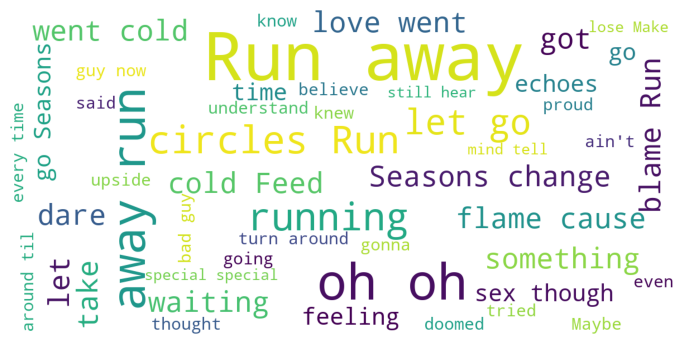

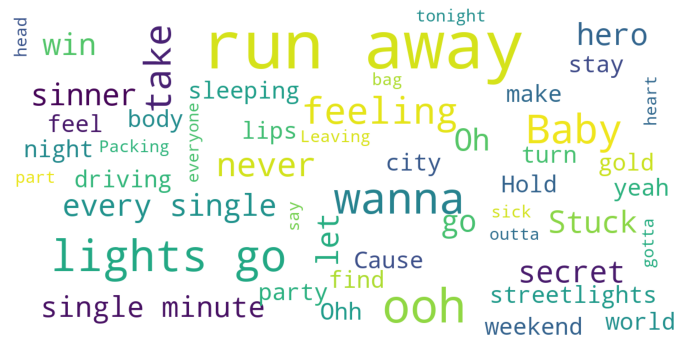

In [20]:
lyrics1, lyrics2 = compare_lyrics('Post Malone', 'Circles')

show_wordcloud(lyrics1)
show_wordcloud(lyrics2)